In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=30)
lngs = np.random.uniform(low=-180.000, high=180.000, size=30)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates=list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
albany au
aswan eg
nizhneyansk ru
east london za
bambous virieux mu
hermanus za
albany au
port alfred za
qaanaaq gl
vaini to
calvinia za
albany au
punta arenas cl
vaini to
faanui pf
georgetown sh
paamiut gl
hervey bay au
grindavik is
cape town za
ushuaia ar
hobart au
balimo pg
ribeira grande pt
isla vista us
waipawa nz
carutapera br
vostok ru
tiksi ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

27

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=699dc5fbdea7b8a1b535e99565525bbb


In [10]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(10)

# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

 # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
 # Add 1 to the record count.
    record_count += 1

 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
     print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | aswan
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | calvinia
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | paamiut
Processing Record 16 of Set 1 | hervey bay
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | balimo
City not found. Skipping...
Processing Record 22 o

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.81,83,100,18.52,AU,2022-07-28 20:17:28
1,Albany,42.6001,-73.9662,90.05,56,100,7.49,US,2022-07-28 20:17:06
2,Aswan,24.0934,32.9070,93.87,16,84,9.31,EG,2022-07-28 20:17:30
3,East London,-33.0153,27.9116,69.85,57,15,16.93,ZA,2022-07-28 20:17:31
4,Bambous Virieux,-20.3428,57.7575,68.25,88,75,8.05,MU,2022-07-28 20:12:37
5,Hermanus,-34.4187,19.2345,57.63,74,0,13.47,ZA,2022-07-28 20:17:34
6,Port Alfred,-33.5906,26.8910,68.23,60,1,14.07,ZA,2022-07-28 20:17:34
7,Qaanaaq,77.4840,-69.3632,41.22,68,11,2.95,GL,2022-07-28 20:17:35
8,Vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,2022-07-28 20:17:35
9,Calvinia,-31.4707,19.7760,45.77,80,0,7.05,ZA,2022-07-28 20:17:36


In [12]:
new_column_order = ["column2", "column4", "column1"]
city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind
                          })
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.81,83,100,18.52,AU,2022-07-28 20:17:28
1,Albany,42.6001,-73.9662,90.05,56,100,7.49,US,2022-07-28 20:17:06
2,Aswan,24.0934,32.9070,93.87,16,84,9.31,EG,2022-07-28 20:17:30
3,East London,-33.0153,27.9116,69.85,57,15,16.93,ZA,2022-07-28 20:17:31
4,Bambous Virieux,-20.3428,57.7575,68.25,88,75,8.05,MU,2022-07-28 20:12:37
5,Hermanus,-34.4187,19.2345,57.63,74,0,13.47,ZA,2022-07-28 20:17:34
6,Port Alfred,-33.5906,26.8910,68.23,60,1,14.07,ZA,2022-07-28 20:17:34
7,Qaanaaq,77.4840,-69.3632,41.22,68,11,2.95,GL,2022-07-28 20:17:35
8,Vaini,-21.2000,-175.2000,77.16,88,40,6.91,TO,2022-07-28 20:17:35
9,Calvinia,-31.4707,19.7760,45.77,80,0,7.05,ZA,2022-07-28 20:17:36


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659039465.0478587

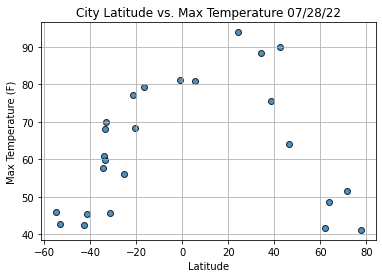

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()